In [1]:
import numpy as np
# incase you havent installed tensorflow(size: 450-500mb)  : !pip install tensorflow

In [11]:

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

In [12]:
#Preprocessing
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float')/255.
x_test = x_test.astype('float')/255.
x_train = np.reshape(x_train,(60000, 784))
x_test = np.reshape(x_test, (10000, 784))

In [6]:
#adding noise

x_train_noisy = x_train + np.random.rand(60000, 784)*0.9
x_test_noisy = x_test + np.random.rand(10000,784) *0.9

x_train_noisy = np.clip(x_train_noisy, 0. , 1.)
x_test_noisy = np.clip(x_test_noisy, 0. , 1.)

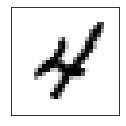

In [8]:
def plot(x,p , labels = False):
    plt.figure(figsize=(20,2))
    for i in range(10):
        plt.imshow(x[i].reshape(28,28), cmap='binary')
        plt.xticks([])
        plt.yticks([])
        if labels:
            plt.xlabel(np.argmax(p[i]))
    plt.show()
    return

plot(x_train, None)
        

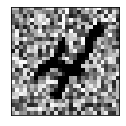

In [9]:
plot(x_train_noisy, None)

In [13]:
#Building and Training a Classifier

In [22]:
classifier = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(256, activation='relu'),
    Dense(10, activation="softmax")
])

classifier.compile(
optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

classifier.fit(x_train, y_train, batch_size=512, epochs= 3)

Epoch 1/3
118/118 [==============================] - 2s 16ms/step - loss: 0.4240 - accuracy: 0.8859
Epoch 2/3
118/118 [==============================] - 2s 14ms/step - loss: 0.1538 - accuracy: 0.9550
Epoch 3/3
118/118 [==============================] - 2s 16ms/step - loss: 0.1024 - accuracy: 0.9703


In [23]:
loss, acc = classifier.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1051 - accuracy: 0.9679


In [24]:
loss, acc = classifier.evaluate(x_test_noisy, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 10.0843 - accuracy: 0.1426


In [25]:
#Building AutoEncoder


In [26]:
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
#Training Autoencoder

autoencoder.fit(
    x_train_noisy, x_train, epochs =100,
    batch_size=512, validation_split=0.2, verbose=False,
    callbacks=[
        EarlyStopping(monitor= 'val_loss', patience = 5),
        LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(" _ ")
print("Training is completed")

0.255 _ 0.221 _ 0.198 _ 0.180 _ 0.169 _ 0.162 _ 0.155 _ 0.149 _ 0.144 _ 0.139 _ 0.135 _ 0.131 _ 0.128 _ 0.126 _ 0.123 _ 0.121 _ 0.120 _ 0.118 _ 0.117 _ 0.115 _ 0.114 _ 0.113 _ 0.113 _ 0.112 _ 0.111 _ 0.111 _ 0.110 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _  _ 
Training is completed


In [29]:
#Denoising Images

predictions = autoencoder.predict(x_test_noisy)


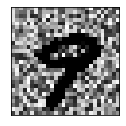

In [30]:
plot(x_test_noisy, None)

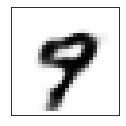

In [32]:
plot(predictions, None)

In [34]:
loss, acc = classifier.evaluate(predictions, y_test)
print(acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1742 - accuracy: 0.9463
0.9463000297546387
